Importing Libraries

In [9]:
import numpy as np
import keras
import tensorflow as tf 
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Loading Cifar10 Dataset

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
# convert from integers to floats
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

In [13]:
x_train = train_norm / 255
x_test = test_norm / 255

In [14]:
x_train.shape

(50000, 32, 32, 3)

Created CNN Model referring Prof Code

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', padding='same',
                 input_shape=x_train.shape[1:]))

model.add(Conv2D(32, (3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
batch_size = 32
epochs = 8 
cnn_model_his=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/8
1563/1563 [==============================] - 244s 155ms/step - loss: 2.2258 - accuracy: 0.1862 - val_loss: 2.0920 - val_accuracy: 0.3056
Epoch 2/8
1563/1563 [==============================] - 245s 157ms/step - loss: 2.0045 - accuracy: 0.2794 - val_loss: 1.9071 - val_accuracy: 0.3512
Epoch 3/8
1563/1563 [==============================] - 232s 149ms/step - loss: 1.8696 - accuracy: 0.3278 - val_loss: 1.7856 - val_accuracy: 0.3937
Epoch 4/8
1563/1563 [==============================] - 237s 152ms/step - loss: 1.7769 - accuracy: 0.3622 - val_loss: 1.7081 - val_accuracy: 0.4127
Epoch 5/8
1563/1563 [==============================] - 244s 156ms/step - loss: 1.7172 - accuracy: 0.3823 - val_loss: 1.6500 - val_accuracy: 0.4298
Epoch 6/8
1563/1563 [==============================] - 232s 149ms/step - loss: 1.6662 - accuracy: 0.4003 - val_loss: 1.6053 - val_accuracy: 0.4387
Epoch 7/8
1563/1563 [==============================] - 231s 148ms/step - loss: 1.6284 - accuracy: 0.4136 - val_loss: 1

In [10]:
model_evaluation_history = model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.5362 - accuracy: 0.4558


In [4]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
        
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

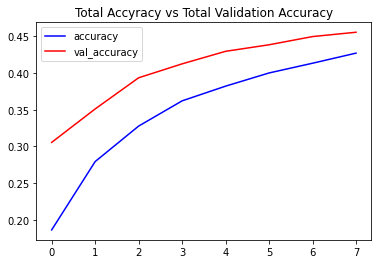

In [12]:
# Visualize the training and validation loss metrices.
plot_metric(cnn_model_his, 'accuracy', 'val_accuracy', 'Total Accyracy vs Total Validation Accuracy')

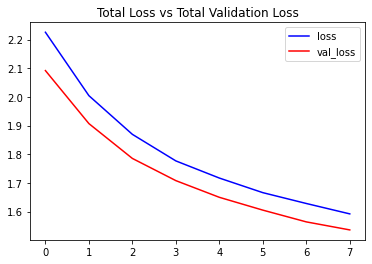

In [13]:
from tensorflow.keras.utils import plot_model
# Visualize the training and validation loss metrices.
plot_metric(cnn_model_his, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

Saving the model

In [14]:
import datetime as dt
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

In [15]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model_file_name = f'PROF_CNN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'
model.save(model_file_name)

Created CNN Model 2

In [17]:
new_cnn_model = Sequential()
new_cnn_model.add(Conv2D(32, (3, 3),activation='relu', padding='same',
                 input_shape=x_train.shape[1:]))


new_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
new_cnn_model.add(Dropout(0.5))                                                   #modified the dropout

new_cnn_model.add(Conv2D(64, (3, 3),activation='relu', padding='same'))
new_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
new_cnn_model.add(Dropout(0.5))

new_cnn_model.add(Conv2D(128, (3, 3),activation='relu', padding='same'))           #added Conv2D Layer                    
new_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
new_cnn_model.add(Dropout(0.5))

new_cnn_model.add(Flatten())
new_cnn_model.add(Dense(512,activation='relu'))

new_cnn_model.add(Dropout(0.5))                                                     #modified the dropout
new_cnn_model.add(Dense(10,activation='softmax'))
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)   

# Let's train the model using RMSprop
new_cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
batch_size = 32
epochs = 8 
new_cnn_model_his=new_cnn_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),shuffle=True)

Epoch 1/8
1563/1563 [==============================] - 166s 105ms/step - loss: 1.7152 - accuracy: 0.3719 - val_loss: 1.6585 - val_accuracy: 0.4169
Epoch 2/8
1563/1563 [==============================] - 176s 113ms/step - loss: 1.4793 - accuracy: 0.4679 - val_loss: 1.4740 - val_accuracy: 0.4889
Epoch 3/8
1563/1563 [==============================] - 174s 112ms/step - loss: 1.4356 - accuracy: 0.4917 - val_loss: 2.7600 - val_accuracy: 0.2707
Epoch 4/8
1563/1563 [==============================] - 177s 113ms/step - loss: 1.4294 - accuracy: 0.4966 - val_loss: 1.5235 - val_accuracy: 0.4799
Epoch 5/8
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4400 - accuracy: 0.5028 - val_loss: 1.5792 - val_accuracy: 0.4631
Epoch 6/8
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4496 - accuracy: 0.5013 - val_loss: 1.4936 - val_accuracy: 0.5125
Epoch 7/8
1563/1563 [==============================] - 168s 107ms/step - loss: 1.4618 - accuracy: 0.4971 - val_loss: 1

In [19]:
model_evaluation_history = new_cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 20s 62ms/step - loss: 1.7445 - accuracy: 0.3947


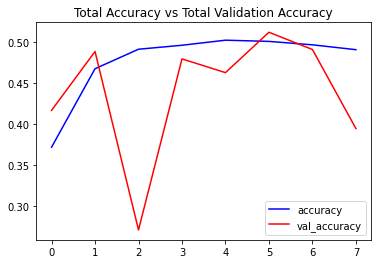

In [22]:
# Visualize the training and validation loss metrices.
plot_metric(new_cnn_model_his, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

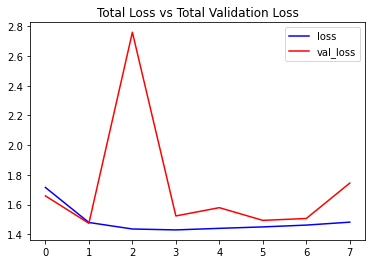

In [23]:
from tensorflow.keras.utils import plot_model
# Visualize the training and validation loss metrices.
plot_metric(new_cnn_model_his, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

Created Model #3

In [15]:
new_cnn_model3 = Sequential()                                                     
new_cnn_model3.add(Conv2D(32, (3, 3),activation='relu', padding='same',
                 input_shape=x_train.shape[1:]))
new_cnn_model3.add(Conv2D(32, (3, 3),activation='relu'))                         # Added 2 Conv2D layers followed by BatchNormalization Layer
new_cnn_model3.add(BatchNormalization())
new_cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
new_cnn_model3.add(Dropout(0.5))                                                  #Set Dropout to 0.5

new_cnn_model3.add(Conv2D(64, (3, 3),activation='relu', padding='same'))
new_cnn_model3.add(BatchNormalization())
new_cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
new_cnn_model3.add(Dropout(0.25))

new_cnn_model3.add(Flatten())
new_cnn_model3.add(Dense(256,activation='relu'))                                   

new_cnn_model3.add(Dropout(0.25))
new_cnn_model3.add(Dense(10,activation='softmax'))
# initiate SGD optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)                                

# train the model using SGD
new_cnn_model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
batch_size = 32
epochs = 5
new_cnn3_model_his=new_cnn_model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 236s 150ms/step - loss: 3.1692 - accuracy: 0.1454 - val_loss: 2.1261 - val_accuracy: 0.2438
Epoch 2/5
1563/1563 [==============================] - 235s 150ms/step - loss: 2.5170 - accuracy: 0.2009 - val_loss: 1.9895 - val_accuracy: 0.2837
Epoch 3/5
1563/1563 [==============================] - 236s 151ms/step - loss: 2.2565 - accuracy: 0.2362 - val_loss: 1.9276 - val_accuracy: 0.2998
Epoch 4/5
1563/1563 [==============================] - 236s 151ms/step - loss: 2.1294 - accuracy: 0.2572 - val_loss: 1.8511 - val_accuracy: 0.3374
Epoch 5/5
1563/1563 [==============================] - 235s 151ms/step - loss: 2.0607 - accuracy: 0.2717 - val_loss: 1.8115 - val_accuracy: 0.3498


In [17]:
model_evaluation_history = new_cnn_model3.evaluate(x_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.8115 - accuracy: 0.3498


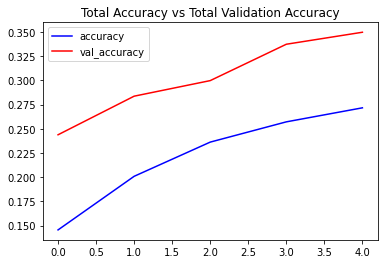

In [18]:
# Visualize the training and validation loss metrices.
plot_metric(new_cnn3_model_his, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

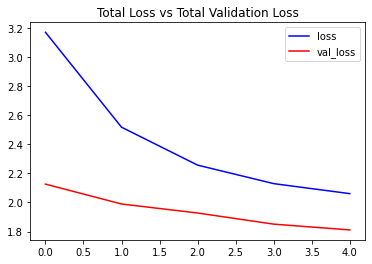

In [19]:
from tensorflow.keras.utils import plot_model
# Visualize the training and validation loss metrices.
plot_metric(new_cnn3_model_his, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [20]:
new_cnn_model4 = Sequential()
new_cnn_model4.add(Conv2D(32, (3, 3),activation='relu', padding='same',
                 input_shape=x_train.shape[1:]))
new_cnn_model4.add(Conv2D(64, (3, 3),activation='relu'))
new_cnn_model4.add(BatchNormalization())
new_cnn_model4.add(MaxPooling2D(pool_size=(2, 2)))


new_cnn_model4.add(Conv2D(128, (3, 3),activation='relu', padding='same'))
new_cnn_model4.add(BatchNormalization())
new_cnn_model4.add(MaxPooling2D(pool_size=(2, 2)))
new_cnn_model4.add(Dropout(0.25))

new_cnn_model4.add(Flatten())
new_cnn_model4.add(Dense(512,activation='relu'))

new_cnn_model4.add(Dropout(0.1))
new_cnn_model4.add(Dense(10,activation='softmax'))
# initiate SGD optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

# Let's train the model using SGD
new_cnn_model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
batch_size = 48
epochs = 5
new_cnn_model4_his=new_cnn_model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),shuffle=True)

Epoch 1/5
1042/1042 [==============================] - 227s 218ms/step - loss: 2.0061 - accuracy: 0.2844 - val_loss: 1.8052 - val_accuracy: 0.3509
Epoch 2/5
1042/1042 [==============================] - 227s 217ms/step - loss: 1.9682 - accuracy: 0.2934 - val_loss: 1.7661 - val_accuracy: 0.3656
Epoch 3/5
1042/1042 [==============================] - 226s 217ms/step - loss: 1.9382 - accuracy: 0.3063 - val_loss: 1.7639 - val_accuracy: 0.3668
Epoch 4/5
1042/1042 [==============================] - 226s 217ms/step - loss: 1.9193 - accuracy: 0.3097 - val_loss: 1.7697 - val_accuracy: 0.3649
Epoch 5/5
1042/1042 [==============================] - 227s 218ms/step - loss: 1.8961 - accuracy: 0.3168 - val_loss: 1.7198 - val_accuracy: 0.3806


In [81]:
model_evaluation_history = new_cnn_model4.evaluate(x_test, y_test)

313/313 [==============================] - 30s 92ms/step - loss: 2.3069 - accuracy: 0.0968


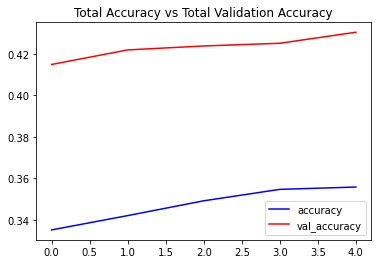

In [82]:
# Visualize the training and validation loss metrices.
plot_metric(new_cnn_model4_his, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

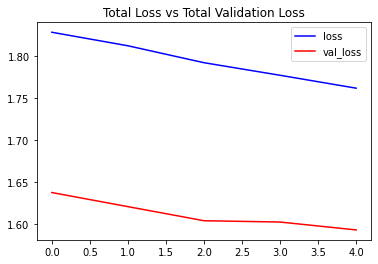

In [83]:
from tensorflow.keras.utils import plot_model
# Visualize the training and validation loss metrices.
plot_metric(new_cnn_model4_his, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')